In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv('PEP.csv')
# le = LabelEncoder()
# df['Date'] = le.fit_transform(df['Date'])
df.head()


,Date,Open,High,Low,Close,Volume
0,1972-06-01,0.000000,0.399388,0.394770,0.399388,318600
1,1972-06-02,0.399388,0.403428,0.398233,0.398233,140400
2,1972-06-05,0.399391,0.399970,0.386078,0.393603,469800
3,1972-06-06,0.390130,0.390130,0.388973,0.390130,140400
4,1972-06-07,0.390130,0.390709,0.386657,0.387815,178200


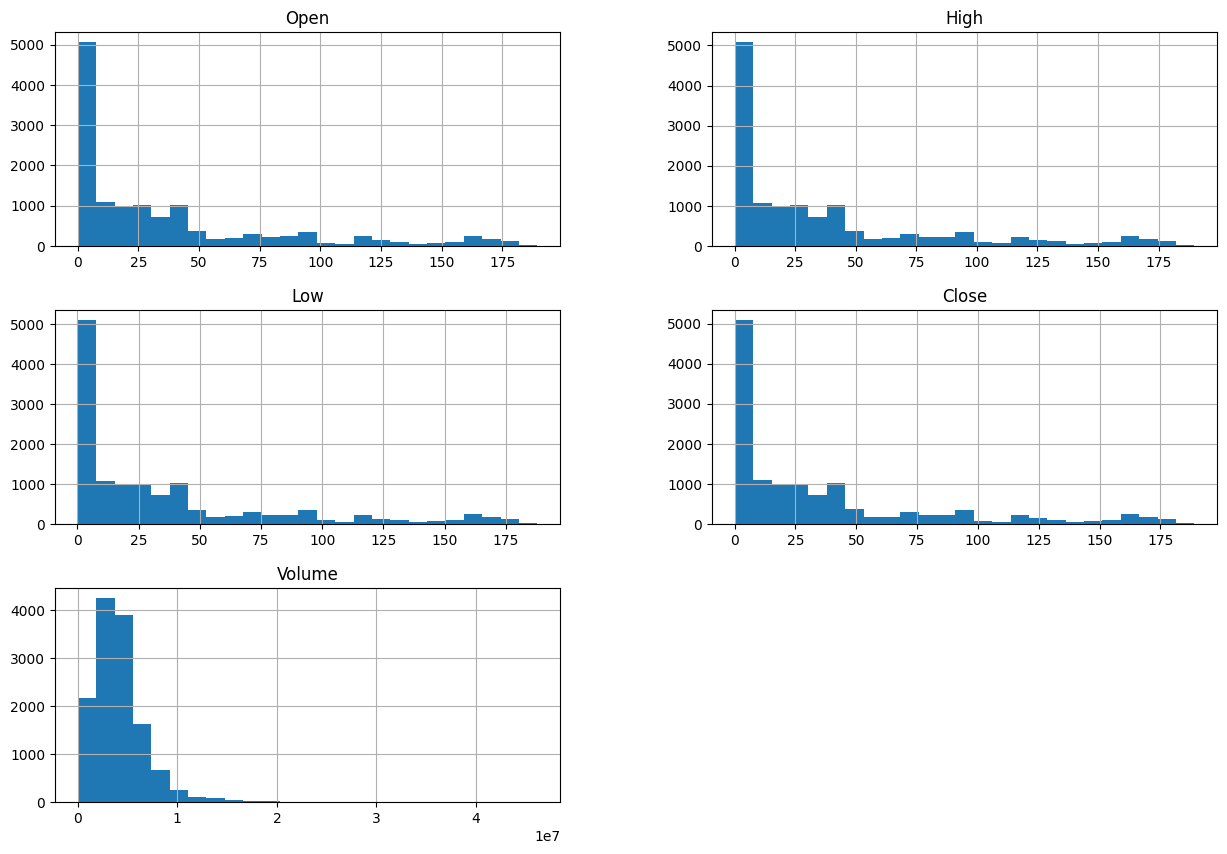

In [43]:
df.hist(bins=25,figsize=(15,10))
plt.show()

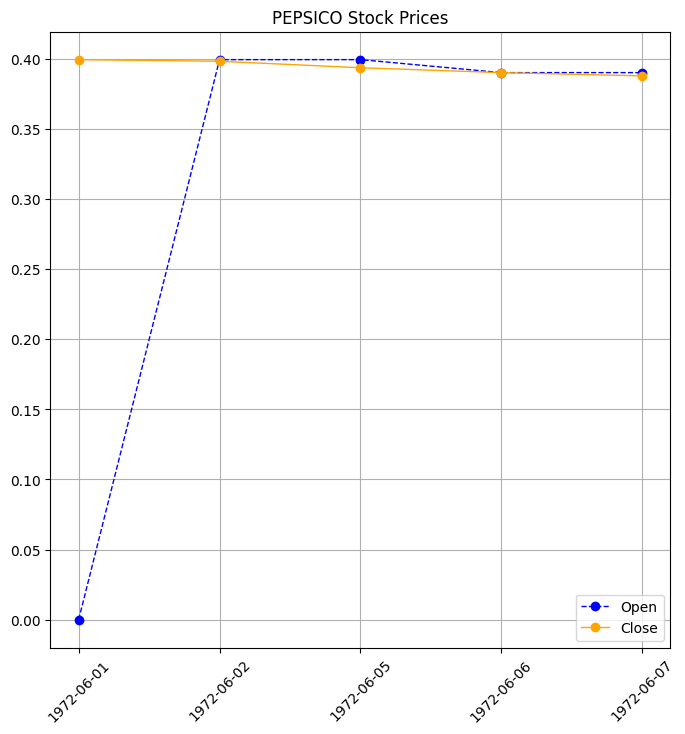

In [49]:
import matplotlib.pyplot as plt

# Using the first few rows of the DataFrame
dt = df.head()

# Extracting 'Open' and 'Close' values from the subset DataFrame
y1 = dt.Open.values
y2 = dt.Close.values

# Setting a more appropriate figure size
plt.figure(figsize=(8, 8))

# Plotting 'Open' prices with a dashed line and distinct color
plt.plot(dt.Date, y1, linestyle='--',marker='o', color='blue', linewidth=1, label='Open')

# Plotting 'Close' prices with a solid line and distinct color
plt.plot(dt.Date, y2, linestyle='-',marker='o', color='orange', linewidth=1, label='Close')

# Adding gridlines for better readability
plt.grid(True)

# Adding a legend to distinguish between the lines
plt.legend()

# Adding axis labels and a title
plt.title('PEPSICO Stock Prices')

# Rotating x-axis labels for better readability (if x-axis is dates)
plt.xticks(rotation=45)

# Displaying the plot
plt.show()



In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score
X=df.drop(['Date','Close'],axis=1)
y=df['Close']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2, random_state=40)
# models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]
 
# for i in range(3):
#     models[i].fit(xtrain, ytrain)
 
#     print(f'{models[i]} : ')
#     print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
#     print('Validation Accuracy : ', metrics.roc_auc_score(
#         ytest, models[i].predict(xtest)))
#     print()
model=[LinearRegression(),Ridge(0.1),Lasso(0.1)]
a=0
for i in model:
    i.fit(xtrain,ytrain)
    ypred=i.predict(xtest)
    mse=mean_squared_error(ytest, ypred)
    r2=r2_score(ytest, ypred)
    # #############
    # plt.scatter(xtest, ytest)
    # plt.plot(xtest, ypred, color='red')
    # plt.show()
    if a<r2:
        a=r2
        model=i
    print('model',i)
    print('mse:',mse)
    print('r2:',r2)
print('highest r2 score',a)
print('model:',model)



model LinearRegression()
mse: 0.11274802780002405
r2: 0.999946198394804
model Ridge(alpha=0.1)
mse: 0.11274376603463677
r2: 0.9999462004284522
model Lasso(alpha=0.1)
mse: 0.40635998220544584
r2: 0.9998060913369693
highest r2 score 0.9999462004284522
model: Ridge(alpha=0.1)
